### 2023-04-02

## 2-2. Mediapipe를 이용한 skeleton keypoint 추출

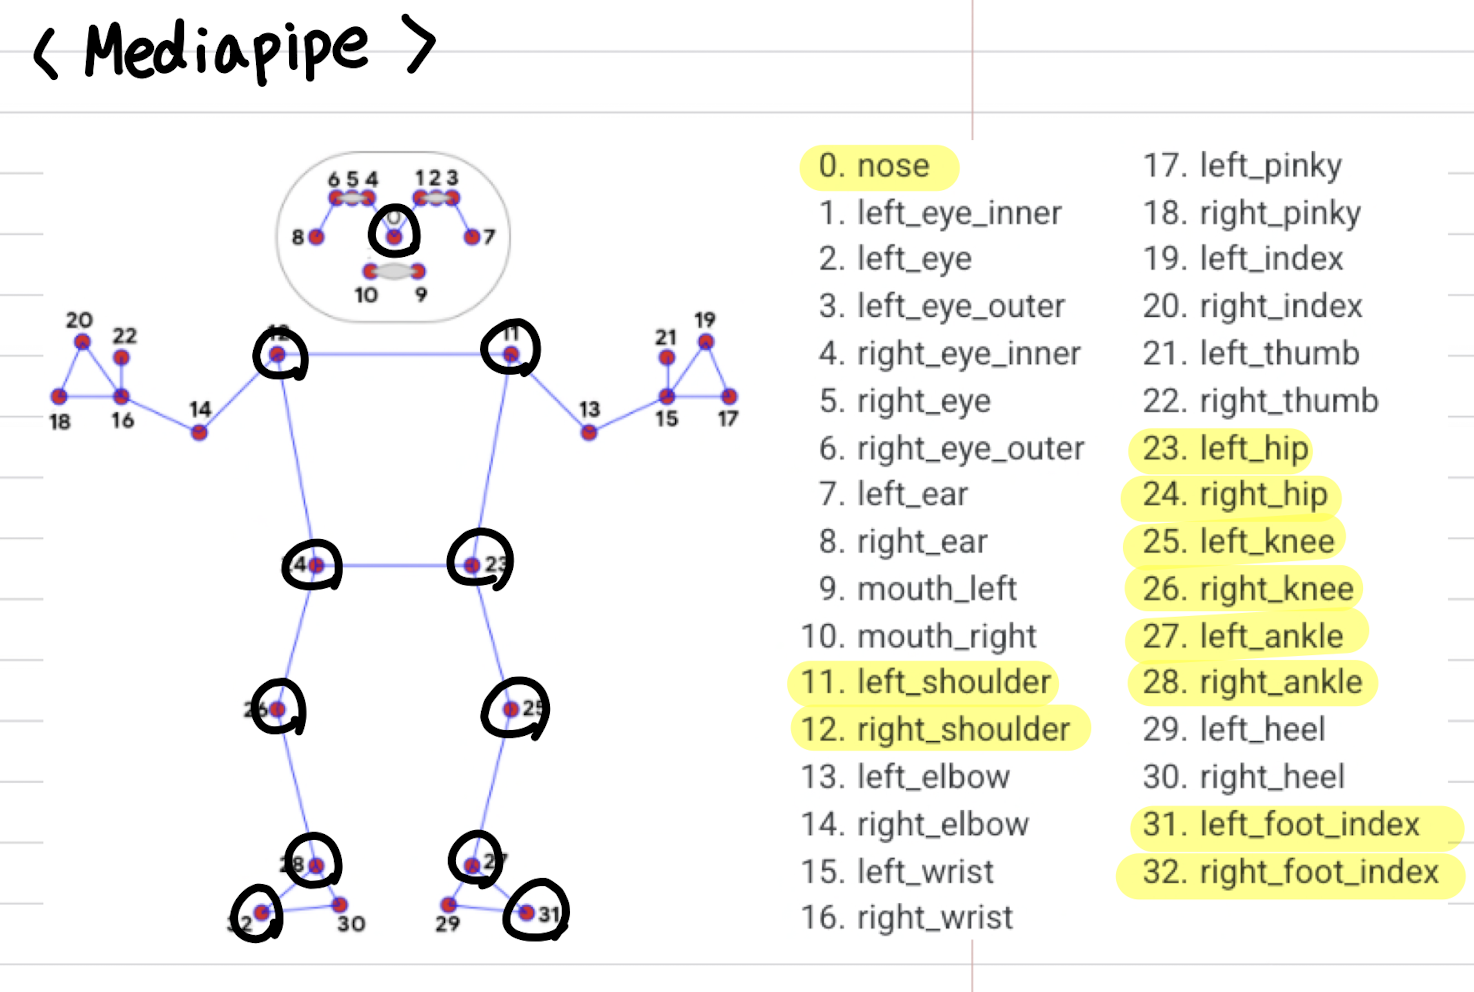
mediapipe 모델에서 필요한 조인트 포인트만 추출하기

In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

objc[1124]: Class CaptureDelegate is implemented in both /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x1045c8860) and /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x299fae5a0). One of the two will be used. Which one is undefined.
objc[1124]: Class CVWindow is implemented in both /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x102dc4a68) and /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x299fae5f0). One of the two will be used. Which one is undefined.
objc[1124]: Class CVView is implemented in both /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x102dc4a90) and /Users/estar-kim/miniconda3/envs/tfgpu2/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x299fae618). One of the two will be used. Wh

## 1. 미디아파이프 테스트 (chatGPT code)

Test image shape = (720, 720, 3)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


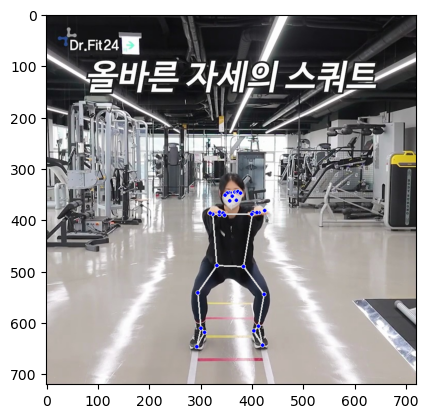

In [2]:
# 이미지에서 프레임을 읽어온다.
image = cv2.imread('./data/images/squat_images/30/exercise_09.jpg')
print(f'Test image shape = {image.shape}')

# 모듈 로드
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# HumanPose 모듈을 사용하여 스켈레톤을 추출한다.
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    
    # 이미지를 RGB로 변환하여 넘겨준다.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 추출된 스켈레톤을 저장할 리스트를 생성한다.
    landmarks_list = []
    
    # 스켈레톤을 추출한다.
    results = pose.process(image)
    
    # 추출된 스켈레톤이 있을 경우 landmarks_list에 저장한다.
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            # 스켈레톤의 좌표를 저장한다.
            landmarks_list.append((landmark.x, landmark.y, landmark.z))
    
    # 추출된 스켈레톤을 이미지에 그린다.
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    
    # 결과 이미지를 보여준다.
    # cv2.imshow('MediaPipe Pose', image)
    # cv2.waitKey(0)
    plt.imshow(image)


In [85]:
len(results.pose_landmarks.landmark)

33

In [90]:
results.pose_landmarks.landmark

[x: 0.50364214
y: 0.49230248
z: -0.28951022
visibility: 0.99997973
, x: 0.51090574
y: 0.48109102
z: -0.26420897
visibility: 0.99996376
, x: 0.5155052
y: 0.48066935
z: -0.2641834
visibility: 0.99996305
, x: 0.5193163
y: 0.48041043
z: -0.26422963
visibility: 0.99996066
, x: 0.4981859
y: 0.48266542
z: -0.26754326
visibility: 0.9999496
, x: 0.4940066
y: 0.4832877
z: -0.26756167
visibility: 0.9999536
, x: 0.4901354
y: 0.48397127
z: -0.2675112
visibility: 0.999943
, x: 0.5255159
y: 0.48470685
z: -0.13006616
visibility: 0.99997854
, x: 0.48394066
y: 0.48927605
z: -0.14212051
visibility: 0.9999697
, x: 0.5140272
y: 0.50302976
z: -0.24035852
visibility: 0.99998605
, x: 0.4971999
y: 0.50526845
z: -0.24415384
visibility: 0.9999844
, x: 0.558088
y: 0.5403666
z: -0.1354925
visibility: 0.99979156
, x: 0.4502905
y: 0.5409133
z: -0.15810584
visibility: 0.99966323
, x: 0.59151417
y: 0.5315532
z: -0.4965819
visibility: 0.9833418
, x: 0.44329304
y: 0.5385756
z: -0.53215414
visibility: 0.98522854
, x: 0.5

#### 위 번호만 추출하여 저장하기

In [68]:
need = [0, 11, 12, 23, 24, 25, 26, 27, 28, 31, 32]
print(f'필요한 keypotin의 개수 : {len(need)}')

필요한 keypotin의 개수 : 11


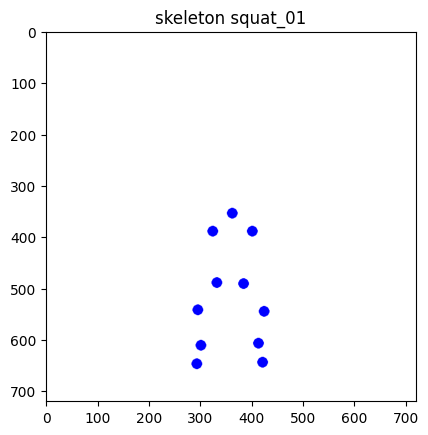

In [69]:
background = np.zeros(shape=image.shape, dtype=np.uint8) + 255

for i in need:
    first = landmarks_list[i]
    cx = int(first[0]*image.shape[1])
    cy = int(first[1]*image.shape[0])
    cv2.circle(background, (cx, cy), radius=5, color=(0,0,255), thickness=10)

plt.title('skeleton squat_01')
plt.imshow(background)

In [13]:
# 원본 사진에 그려보기

background = cv2.imread('./data/images/squat_images/30/exercise_09.jpg')

for i in need:
    first = landmarks_list[i]
    cx = int(first[0]*image.shape[1])
    cy = int(first[1]*image.shape[0])
    cv2.circle(background, (cx, cy), radius=3, color=(0,0,255), thickness=5)

plt.title('skeleton squat_01')
plt.imshow(background)

NameError: name 'need' is not defined

In [77]:
results.pose_landmarks.ListFields()[0][1]

[x: 0.50364214
y: 0.49230248
z: -0.28951022
visibility: 0.99997973
, x: 0.51090574
y: 0.48109102
z: -0.26420897
visibility: 0.99996376
, x: 0.5155052
y: 0.48066935
z: -0.2641834
visibility: 0.99996305
, x: 0.5193163
y: 0.48041043
z: -0.26422963
visibility: 0.99996066
, x: 0.4981859
y: 0.48266542
z: -0.26754326
visibility: 0.9999496
, x: 0.4940066
y: 0.4832877
z: -0.26756167
visibility: 0.9999536
, x: 0.4901354
y: 0.48397127
z: -0.2675112
visibility: 0.999943
, x: 0.5255159
y: 0.48470685
z: -0.13006616
visibility: 0.99997854
, x: 0.48394066
y: 0.48927605
z: -0.14212051
visibility: 0.9999697
, x: 0.5140272
y: 0.50302976
z: -0.24035852
visibility: 0.99998605
, x: 0.4971999
y: 0.50526845
z: -0.24415384
visibility: 0.9999844
, x: 0.558088
y: 0.5403666
z: -0.1354925
visibility: 0.99979156
, x: 0.4502905
y: 0.5409133
z: -0.15810584
visibility: 0.99966323
, x: 0.59151417
y: 0.5315532
z: -0.4965819
visibility: 0.9833418
, x: 0.44329304
y: 0.5385756
z: -0.53215414
visibility: 0.98522854
, x: 0.5

## 2. 함수로 표현하기

In [2]:
import mediapipe as mp
import cv2
import os

def img_to_skeleton(image_path):
    
    # 모듈 로드
    mp_pose = mp.solutions.pose
    
    # 이미지에서 프레임을 읽어온다.
    image = cv2.imread(image_path)
    
    # HumanPose 모듈을 사용하여 스켈레톤을 추출한다.
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as pose:
        
        # 추출된 스켈레톤을 저장할 리스트를 생성한다.
        landmarks_list = []
        
        # 스켈레톤을 추출한다.
        results = pose.process(image)
        landmark = results.pose_landmarks.landmark
        
        if len(landmark) == 33: # 33보다 적거나 많다는 것은 잘못된 추출이다.
#             landmark = results.pose_landmarks.landmark
            
            # 필요한 관절 좌표만 선별적으로 저장한다.
            need = [0, 11, 12, 23, 24, 25, 26, 27, 28, 31, 32]
            for i in need:
                # 스켈레톤의 좌표를 저장한다.
                x = round(landmark[i].x, 5)
                y = round(landmark[i].y, 5)
                landmarks_list.append((x, y)) # x,y좌표만 저장한다.
                
        else:
            return 'There is a problem.'
        
    return landmarks_list

In [3]:
sorted(os.listdir('./data/images/sample2/'))

['exercise_00.jpg',
 'exercise_01.jpg',
 'exercise_02.jpg',
 'exercise_03.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_08.jpg',
 'exercise_09.jpg',
 'exercise_10.jpg',
 'exercise_11.jpg',
 'exercise_12.jpg',
 'exercise_13.jpg',
 'exercise_14.jpg']

In [5]:
lst_tot = []

path = './data/images/sample2/'

lst = sorted(os.listdir(path))

for i in lst:
#     print(i)
    img_path = path + i
    lst_tot.append(img_to_skeleton(img_path))

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
lst_tot

[[(0.52282, 0.20917),
  (0.63405, 0.28787),
  (0.41422, 0.28931),
  (0.60158, 0.52224),
  (0.4381, 0.52067),
  (0.6515, 0.70376),
  (0.38985, 0.70141),
  (0.67151, 0.86796),
  (0.37314, 0.87897),
  (0.77374, 0.93052),
  (0.30715, 0.94436)],
 [(0.52437, 0.19834),
  (0.64149, 0.27693),
  (0.40765, 0.27656),
  (0.60163, 0.51825),
  (0.43499, 0.51819),
  (0.64798, 0.69877),
  (0.38997, 0.70295),
  (0.67759, 0.87011),
  (0.37187, 0.87964),
  (0.77727, 0.93008),
  (0.30153, 0.94267)],
 [(0.51838, 0.20569),
  (0.62892, 0.28898),
  (0.40321, 0.28287),
  (0.58523, 0.52376),
  (0.42283, 0.52309),
  (0.6648, 0.69343),
  (0.36834, 0.70104),
  (0.66871, 0.87101),
  (0.3609, 0.88454),
  (0.78668, 0.92759),
  (0.28561, 0.94499)],
 [(0.52131, 0.2428),
  (0.63444, 0.33241),
  (0.40525, 0.3288),
  (0.58625, 0.56113),
  (0.41859, 0.56266),
  (0.72442, 0.70689),
  (0.32693, 0.7195),
  (0.68645, 0.87558),
  (0.35084, 0.88793),
  (0.7947, 0.92411),
  (0.28307, 0.94281)],
 [(0.52214, 0.3269),
  (0.63661, 0.4

len = 11
img shape : (1280, 720, 3)
x : 1280, y : 720



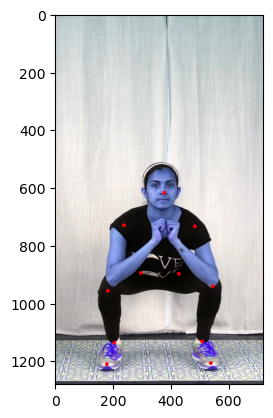

In [20]:
import matplotlib.pyplot as plt

# 함수 실행
testImg_path = './data/total_0513/2_2_images/122/exercise_08.jpg'

lst = img_to_skeleton(testImg_path)
print(f'len = {len(lst)}')

img_test = cv2.imread(testImg_path)
print(f'img shape : {img_test.shape}')
print(f'x : {img_test.shape[0]}, y : {img_test.shape[1]}')

for i in lst:
    cx = int(i[0]*img_test.shape[1])
    cy = int(i[1]*img_test.shape[0])
    cv2.circle(img_test, (cx, cy), radius=3, color=(255,0,0), thickness=5)

plt.imshow(img_test)

print()

In [27]:
# img_data_path = './data/total/2_1_image/' # 모든 랩스별 폴더의 상위 폴더경로
# temp = sorted(os.listdir(img_data_path))
# temp2 = []

# for i in temp:
#     if i == '.DS_Store':
#         pass
#     else:
#         temp2.append(i)

# for i in range(len(temp2)):
#     old_name = img_data_path + temp2[i]
#     if i+34 < 10:
#         new_name = img_data_path + f'00{i+34}/'
#     elif i+34 < 10:
#         new_name = img_data_path + f'0{i+34}/'
#     else:
#         new_name = img_data_path + f'{i+34}/'
        
#     os.rename(old_name, new_name)

<br><br>

## 3. 가지고 있는 이미지 데이터셋 스켈레톤 추출하여 저장하기

In [5]:
import pandas as pd
import numpy as np

img_data_path = './data/total_0513/2_4_images/' # 모든 랩스별 폴더의 상위 폴더경로
temp = sorted(os.listdir(img_data_path))

img_data_list = []

for i in temp:
    if i == '.DS_Store':
        pass
    else:
        img_data_list.append(i)
    
print(f'count : {len(img_data_list)}\n\n')
img_data_list

for rep in range(len(img_data_list)):
# for rep in range(34, len(img_data_list) + 34):
    print(f'rep = {rep}')
    rep_path = os.path.join(img_data_path, img_data_list[rep]) # 각 랩스별 이미지 폴더
    rep_img_path = sorted(os.listdir(rep_path)) # 랩스별 이미지 이름 리스트
    
    total_skeleton = [] # 각 랩스별 추출한 스켈레톤 좌표를 저장할 리스트
    for img_name in rep_img_path:
        if img_name != '.DS_Store':
            print(f'img_name : {img_name}')
            img_path = os.path.join(rep_path, img_name)
            total_skeleton.append(img_to_skeleton(img_path))
    
    # 데이터프레임으로 만들기
    df = pd.DataFrame()
    for i in range(len(total_skeleton)):
        temp = np.array(total_skeleton[i])
        temp = temp.flatten()
        df[i] = temp
    
    df_total = df.T
    
    # csv 파일로 저장하기
    if rep < 10:
        df_total.to_csv(f'./data/total_0513/3_1_csv/squat_skeleton{img_data_list[rep]}.csv')
    elif rep < 100:
        df_total.to_csv(f'./data/total_0513/3_1_csv/squat_skeleton{img_data_list[rep]}.csv')
    else:
        df_total.to_csv(f'./data/total_0513/3_1_csv/squat_skeleton{img_data_list[rep]}.csv')
        
print('end! \n\n')

count : 9


rep = 0
img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name : exercise_06.jpg
img_name : exercise_07.jpg
img_name : exercise_08.jpg
img_name : exercise_09.jpg
img_name : exercise_10.jpg
img_name : exercise_11.jpg
img_name : exercise_12.jpg
img_name : exercise_13.jpg
img_name : exercise_14.jpg
rep = 1
img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name : exercise_06.jpg
img_name : exercise_07.jpg
img_name : exercise_08.jpg
img_name : exercise_09.jpg
img_name : exercise_10.jpg
img_name : exercise_11.jpg
img_name : exercise_12.jpg
img_name : exercise_13.jpg
img_name : exercise_14.jpg
rep = 2
img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise

In [ ]:
rep = 38
img_data_list[rep]

<br><br>

## 스켈레톤이 잘 추출되는지 먼저 알아보려면 이 코드 돌려보기

In [3]:
img_data_path = './data/total_0513/2_4_images/' # 모든 랩스별 폴더의 상위 폴더경로
temp = sorted(os.listdir(img_data_path))

img_data_list = []

for i in temp:
    if i == '.DS_Store':
        pass
    else:
        img_data_list.append(i)
    
print(f'count : {len(img_data_list)}\n\n')
# img_data_list

for rep in range(len(img_data_list)):
# for rep in range(68, len(img_data_list)):
    print(f'rep = {rep + 84}')
    rep_path = os.path.join(img_data_path, img_data_list[rep]) # 각 랩스별 이미지 폴더
    rep_img_path = sorted(os.listdir(rep_path)) # 랩스별 이미지 이름 리스트
    
    total_skeleton = [] # 각 랩스별 추출한 스켈레톤 좌표를 저장할 리스트
    for img_name in rep_img_path:
        if img_name != '.DS_Store':
            print(f'img_name : {img_name}')
            img_path = os.path.join(rep_path, img_name)
            total_skeleton.append(img_to_skeleton(img_path))
            
    print(f'{rep+123} 폴더 이미지 정상적으로 스켈레톤 추출됨.\n')
        
print('end! \n\n')

count : 9


rep = 84
img_name : exercise_00.jpg
img_name : exercise_01.jpg


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name : exercise_06.jpg
img_name : exercise_07.jpg
img_name : exercise_08.jpg
img_name : exercise_09.jpg
img_name : exercise_10.jpg
img_name : exercise_11.jpg
img_name : exercise_12.jpg
img_name : exercise_13.jpg
img_name : exercise_14.jpg
123 폴더 이미지 정상적으로 스켈레톤 추출됨.

rep = 85
img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name : exercise_06.jpg
img_name : exercise_07.jpg
img_name : exercise_08.jpg
img_name : exercise_09.jpg
img_name : exercise_10.jpg
img_name : exercise_11.jpg
img_name : exercise_12.jpg
img_name : exercise_13.jpg
img_name : exercise_14.jpg
124 폴더 이미지 정상적으로 스켈레톤 추출됨.

rep = 86
img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name

### 단일 폴더에 대해서만 추출할 경우 이 코드 사용하기

In [11]:
# 1. 경로를 통해 이미지 리스트 불러오기
img_data_path = './data/images/sample2/'
temp = sorted(os.listdir(img_data_path))

img_data_list = []

for i in temp:
    if i == '.DS_Store':
        pass
    else:
        img_data_list.append(i)
        
total_skeleton = [] # 각 랩스별 추출한 스켈레톤 좌표를 저장할 리스트

# 2. 각 이미지 경로 지정해서 함수에 넣기
for img_name in img_data_list:
    print(f'img_name : {img_name}')
    img_path = os.path.join(img_data_path, img_name)
    total_skeleton.append(img_to_skeleton(img_path))
    
# 데이터프레임으로 만들기
df = pd.DataFrame()
for i in range(len(total_skeleton)):
    temp = np.array(total_skeleton[i])
    temp = temp.flatten()
    df[i] = temp

df_total = df.T

# csv 파일로 저장하기
df_total.to_csv(f'./data/csv/squat_test/squat_skeleton_test1.csv')

img_name : exercise_00.jpg
img_name : exercise_01.jpg
img_name : exercise_02.jpg
img_name : exercise_03.jpg
img_name : exercise_04.jpg
img_name : exercise_05.jpg
img_name : exercise_06.jpg
img_name : exercise_07.jpg
img_name : exercise_08.jpg
img_name : exercise_09.jpg
img_name : exercise_10.jpg
img_name : exercise_11.jpg
img_name : exercise_12.jpg
img_name : exercise_13.jpg
img_name : exercise_14.jpg


### 결과 확인하기

In [6]:
pd.read_csv('./data/csv/skeleton_squat/squat_skeleton00.csv')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,0,0.48919,0.16059,0.61322,0.25890,0.35582,0.26689,0.57819,0.50933,0.40289,...,0.35083,0.71906,0.66521,0.89063,0.31750,0.89752,0.77351,0.95428,0.22593,0.96713
1,1,0.49163,0.16628,0.61065,0.26227,0.35769,0.26975,0.57721,0.50601,0.40038,...,0.35245,0.71909,0.66995,0.89037,0.31936,0.89529,0.77325,0.95728,0.22997,0.96488
2,2,0.49316,0.16503,0.61507,0.26085,0.35974,0.26356,0.57302,0.50594,0.40222,...,0.35336,0.71335,0.66339,0.88898,0.32171,0.88589,0.77177,0.95322,0.23218,0.95883
3,3,0.48892,0.16060,0.61782,0.25734,0.36460,0.26332,0.57428,0.50715,0.39885,...,0.35030,0.71245,0.66759,0.88732,0.32016,0.89072,0.77949,0.95316,0.22272,0.96346
4,4,0.49480,0.17635,0.61342,0.26889,0.36214,0.27765,0.57676,0.51873,0.40431,...,0.32796,0.69363,0.67339,0.88687,0.32720,0.89166,0.79428,0.95257,0.22187,0.96048
5,5,0.48943,0.25601,0.63725,0.35166,0.34624,0.35736,0.57755,0.58792,0.39657,...,0.24506,0.72636,0.68440,0.90020,0.30141,0.90502,0.80142,0.95183,0.20816,0.96640
6,6,0.48558,0.37706,0.63720,0.46092,0.33456,0.46502,0.58080,0.66779,0.39735,...,0.19607,0.75728,0.68085,0.89946,0.31003,0.90448,0.79605,0.95214,0.21249,0.96406
7,7,0.48649,0.45039,0.64286,0.53784,0.34203,0.54252,0.58648,0.72742,0.42370,...,0.19989,0.75606,0.68974,0.89698,0.31469,0.89966,0.79344,0.95027,0.21757,0.96391
8,8,0.49162,0.46921,0.64189,0.55912,0.33913,0.55958,0.58638,0.74649,0.42208,...,0.20591,0.76167,0.69248,0.89828,0.31348,0.90253,0.79119,0.94583,0.22030,0.96077
9,9,0.49563,0.46400,0.64345,0.55170,0.34134,0.55344,0.59011,0.74098,0.42526,...,0.20621,0.75758,0.68184,0.89899,0.31763,0.90358,0.78827,0.95057,0.22013,0.96460


In [6]:
df_test = pd.read_csv('./data/total_0513/3_csv/squat_skeleton090.csv')
df_test.set_index('Unnamed: 0', inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.51784,0.17898,0.67201,0.26341,0.36414,0.26050,0.59689,0.48772,0.42120,0.48592,...,0.35533,0.64439,0.73651,0.81495,0.26483,0.82015,0.80367,0.86724,0.20453,0.87064
1,0.51965,0.17451,0.66954,0.26502,0.35855,0.26237,0.59103,0.48540,0.41806,0.48624,...,0.35358,0.65234,0.73702,0.81486,0.26626,0.81838,0.80382,0.86683,0.21080,0.86984
2,0.52011,0.18034,0.67058,0.26445,0.35932,0.26186,0.59431,0.48568,0.41986,0.48524,...,0.35980,0.64569,0.73550,0.81851,0.26551,0.81609,0.81047,0.86829,0.21669,0.86890
3,0.52618,0.17712,0.67377,0.26457,0.36137,0.26469,0.60300,0.48723,0.43008,0.48719,...,0.36267,0.64571,0.73559,0.81541,0.26657,0.81611,0.80629,0.86689,0.20966,0.86552
4,0.52448,0.19819,0.67723,0.27972,0.35741,0.28276,0.59910,0.49276,0.42255,0.49208,...,0.34752,0.64349,0.73788,0.81514,0.26681,0.81957,0.80409,0.86740,0.20861,0.87149
5,0.52285,0.25725,0.67944,0.34413,0.35661,0.34251,0.58910,0.52485,0.42297,0.52286,...,0.31238,0.64982,0.74206,0.82065,0.26730,0.81919,0.81117,0.87082,0.20296,0.86897
6,0.52594,0.35277,0.67617,0.42935,0.35443,0.42323,0.59882,0.57677,0.40878,0.57594,...,0.27799,0.66857,0.73857,0.81685,0.26689,0.82064,0.80986,0.86694,0.19805,0.86694
7,0.52780,0.43326,0.67622,0.49523,0.35566,0.49897,0.60091,0.62442,0.42462,0.62571,...,0.27670,0.67991,0.74325,0.82049,0.26547,0.82166,0.80460,0.87026,0.19883,0.86591
8,0.52812,0.48815,0.67776,0.54484,0.36774,0.54602,0.59822,0.67484,0.43646,0.67495,...,0.27680,0.68864,0.73355,0.82301,0.27430,0.82761,0.82207,0.86651,0.19314,0.86792


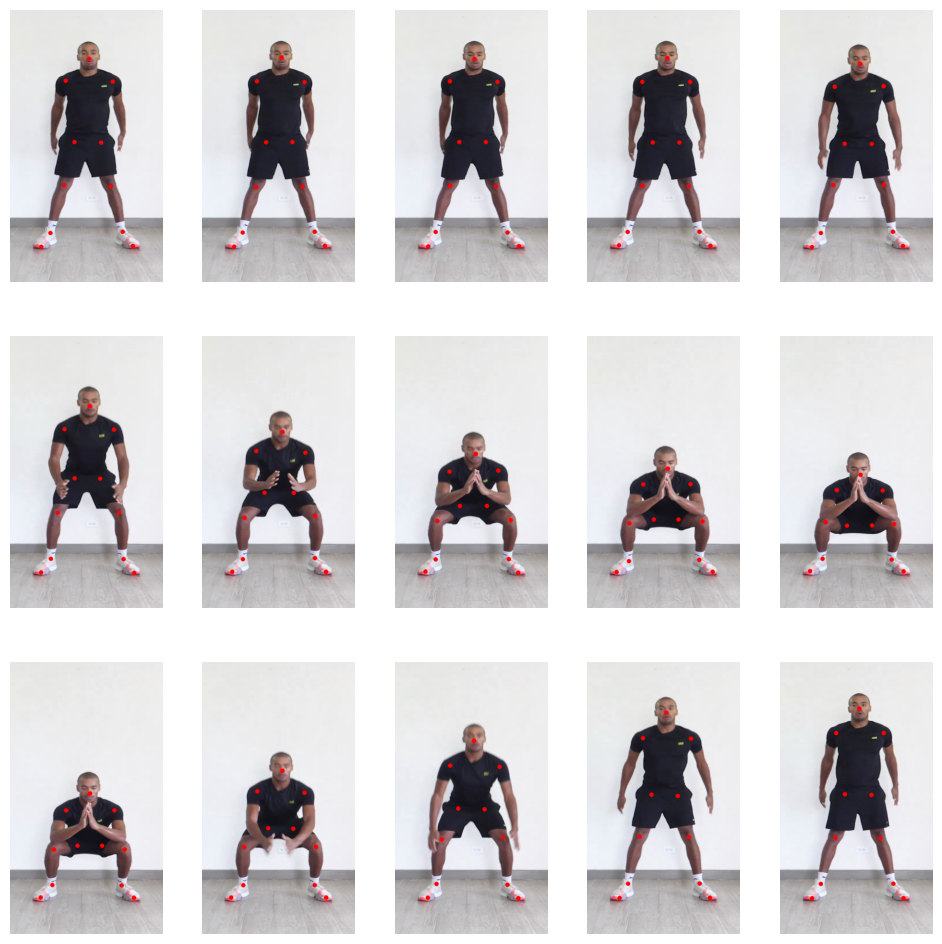

In [ ]:
img_list = os.listdir(f'./data/total_0513/2_2_images/090/')
img_list = sorted(img_list)
fig, ax = plt.subplots(3, 5, figsize = (12,12))

for i in range(df_test.shape[0]):
    background = cv2.imread(f'./data/total_0513/2_2_images/090/' + img_list[i])
    background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
    temp = df_test.iloc[i]
    temp = np.array(temp)
    temp = temp.reshape(11, 2)
    
    for j in temp:
        cx = int(j[0]*background.shape[1])
        cy = int(j[1]*background.shape[0])
        cv2.circle(background, (cx, cy), radius=5, color=(255,0,0), thickness=10)
    
    plt.subplot(3, 5, i + 1)
    plt.imshow(background)
    plt.axis('off')

### 이제 위에서 얻은 키포인트의 좌표값들을 데이터프레임으로 만들어서 csv파일로 저장한다.

In [ ]:
columns_rename = [
              'noseX', 'noseY',
              'left_shoulderX', 'left_shoulderY',
              'right_shoulderX', 'right_shoulderY',
              'left_elbowX', 'left_elbowY',
              'right_elbowX', 'right_elbowY',
              'left_wristX', 'left_wristY',
              'right_wristX', 'right_wristY',
              'left_hipX', 'left_hipY',
              'right_hipX', 'right_hipY',
              'left_kneeX', 'left_kneeY',
              'right_kneeX', 'right_kneeY',
              'left_ankleX', 'left_ankleY',
              'right_ankleX', 'right_ankleY',
              'left_footX', 'left_footY',
              'right_footX', 'right_footY'
              ]

In [ ]:
columns_rename

['noseX',
 'noseY',
 'left_shoulderX',
 'left_shoulderY',
 'right_shoulderX',
 'right_shoulderY',
 'left_elbowX',
 'left_elbowY',
 'right_elbowX',
 'right_elbowY',
 'left_wristX',
 'left_wristY',
 'right_wristX',
 'right_wristY',
 'left_hipX',
 'left_hipY',
 'right_hipX',
 'right_hipY',
 'left_kneeX',
 'left_kneeY',
 'right_kneeX',
 'right_kneeY',
 'left_ankleX',
 'left_ankleY',
 'right_ankleX',
 'right_ankleY',
 'left_footX',
 'left_footY',
 'right_footX',
 'right_footY']

In [ ]:
df.columns = set_colums

In [ ]:
df.to_csv('/content/drive/MyDrive/2023/캡스톤디자인/csv/sample.csv')

<br><br><br>


## 1. 16장의 이미지에 대해 csv 파일 추출하기
- 함수로 구현하기
- 이미지 추출하는데 타이머 세팅해서 시간 계산하기

In [ ]:
# 1. 이미지 불러오기

import os

images_path = '/content/drive/MyDrive/2023/캡스톤디자인/sample1/'
temp = os.listdir(images_path)
temp

['exercise_13.jpg',
 'exercise_08.jpg',
 'exercise_12.jpg',
 'exercise_09.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_11.jpg',
 'exercise_00.jpg',
 'exercise_03.jpg',
 'exercise_14.jpg',
 'exercise_01.jpg',
 'exercise_15.jpg',
 'exercise_10.jpg',
 'exercise_02.jpg']

In [ ]:
images = sorted(temp)
images

['exercise_00.jpg',
 'exercise_01.jpg',
 'exercise_02.jpg',
 'exercise_03.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_08.jpg',
 'exercise_09.jpg',
 'exercise_10.jpg',
 'exercise_11.jpg',
 'exercise_12.jpg',
 'exercise_13.jpg',
 'exercise_14.jpg',
 'exercise_15.jpg']

In [ ]:
images_path + images[0]

'/content/drive/MyDrive/2023/캡스톤디자인/sample1/exercise_00.jpg'

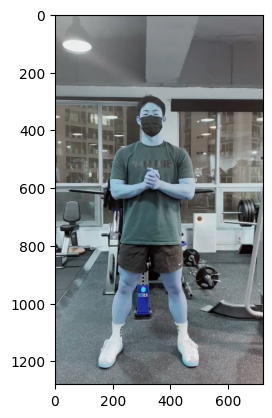

In [ ]:
testImg = cv2.imread(images_path + images[0])
plt.imshow(testImg)

In [ ]:
a = results.pose_landmarks
len(a.ListFields()[0][1])

33

In [ ]:
landmarks_list

[(0.4394882917404175, 0.5071427822113037, -0.7704789638519287),
 (0.45223337411880493, 0.4949374198913574, -0.731069803237915),
 (0.4623432457447052, 0.4953121244907379, -0.7310514450073242),
 (0.4730384945869446, 0.4957200586795807, -0.7311952114105225),
 (0.4256797432899475, 0.494956910610199, -0.7322556972503662),
 (0.4154217541217804, 0.4955376982688904, -0.73246830701828),
 (0.4060954749584198, 0.4963894486427307, -0.7326098680496216),
 (0.49396899342536926, 0.5035357475280762, -0.5108066201210022),
 (0.39234158396720886, 0.5054487586021423, -0.5091472864151001),
 (0.45583316683769226, 0.5223586559295654, -0.6875375509262085),
 (0.4274747967720032, 0.5229222774505615, -0.6873877048492432),
 (0.5768585801124573, 0.5857763290405273, -0.3918307423591614),
 (0.3127090334892273, 0.5842219591140747, -0.40903440117836),
 (0.6131676435470581, 0.6962302923202515, -0.6170822978019714),
 (0.28787270188331604, 0.6981194615364075, -0.6400813460350037),
 (0.4929873049259186, 0.6597838401794434,

In [23]:
import mediapipe as mp
import cv2

def img_to_skeleton(image_path):
    
    # 모듈 로드
    mp_pose = mp.solutions.pose
    
    # 이미지에서 프레임을 읽어온다.
    image = cv2.imread(image_path)
    
    # HumanPose 모듈을 사용하여 스켈레톤을 추출한다.
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    ) as pose:
        
        # 추출된 스켈레톤을 저장할 리스트를 생성한다.
        landmarks_list = []
        
        # 스켈레톤을 추출한다.
        results = pose.process(image)
        
        if len(results.pose_landmarks.ListFields()[0][1]) == 33: # 33보다 적거나 많다는 것은 잘못된 추출이다.
            landmark = results.pose_landmarks.landmark
            
            # 필요한 관절 좌표만 선별적으로 저장한다.
            need = [0, 11, 12, 23, 24, 25, 26, 27, 28, 31, 32]
            for i in need:
                # 스켈레톤의 좌표를 저장한다.
                x = round(landmark[i].x, 5)
                y = round(landmark[i].y, 5)
                landmarks_list.append((x, y)) # x,y좌표만 저장한다.
                
        else:
            return 'There is a problem.'
        
    return landmarks_list

In [27]:
# 함수 실행
testImg_path = './data/images/squat_images/30/exercise_00.jpg'

lst = img_to_skeleton(testImg_path)

In [28]:
len(lst)

11

In [29]:
lst

[(0.51456, 0.33801),
 (0.56902, 0.38124),
 (0.44332, 0.3746),
 (0.54343, 0.57174),
 (0.46858, 0.5701),
 (0.55456, 0.71352),
 (0.45416, 0.71837),
 (0.57104, 0.84813),
 (0.42259, 0.84906),
 (0.5833, 0.89545),
 (0.41032, 0.89609)]

In [30]:
img_test = cv2.imread(testImg_path)

In [31]:
print(f'img shape : {img_test.shape}')
print(f'x : {img_test.shape[0]}, y : {img_test.shape[1]}')

img shape : (720, 720, 3)
x : 720, y : 720


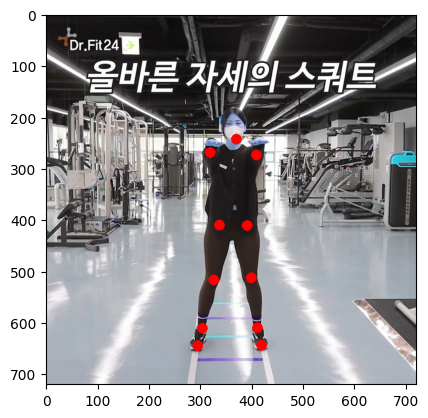

In [40]:
import matplotlib.pyplot as plt

for i in lst:
    cx = int(i[0]*img_test.shape[1])
    cy = int(i[1]*img_test.shape[0])
    cv2.circle(img_test, (cx, cy), radius=3, color=(255,0,0), thickness=5)

plt.imshow(img_test)

done.

## 2. 이제 위에서 만든 함수를 응용하여 16개의 이미지에 대해서 스켈레톤을 추출하고 리스트로 저장하자.

In [ ]:
import os

directory = '/content/drive/MyDrive/2023/캡스톤디자인/sample1/'

sample1 = os.listdir(directory)
sample1 = sorted(sample1)
sample1

['exercise_00.jpg',
 'exercise_01.jpg',
 'exercise_02.jpg',
 'exercise_03.jpg',
 'exercise_04.jpg',
 'exercise_05.jpg',
 'exercise_06.jpg',
 'exercise_07.jpg',
 'exercise_08.jpg',
 'exercise_09.jpg',
 'exercise_10.jpg',
 'exercise_11.jpg',
 'exercise_12.jpg',
 'exercise_13.jpg',
 'exercise_14.jpg',
 'exercise_15.jpg']

In [ ]:
total_skeleton = []

for img in sample1 :
  path = directory + img
  total_skeleton.append(img_to_skeleton(path))

In [ ]:
len(total_skeleton)

16

In [ ]:
total_skeleton[0]

[(333, 364),
 (431, 480),
 (243, 483),
 (466, 626),
 (215, 638),
 (360, 595),
 (309, 596),
 (391, 756),
 (283, 750),
 (419, 951),
 (243, 947),
 (447, 1112),
 (215, 1116),
 (470, 1201),
 (182, 1204)]

In [ ]:
for skeleton in range(len(total_skeleton)):
  for i in skeleton:
    temp = np.array(i).flatten()
    

(333, 364)
(431, 480)
(243, 483)
(466, 626)
(215, 638)
(360, 595)
(309, 596)
(391, 756)
(283, 750)
(419, 951)
(243, 947)
(447, 1112)
(215, 1116)
(470, 1201)
(182, 1204)


In [ ]:
import numpy as np

arr1 = np.array(total_skeleton[0])
arr1 = arr1.flatten()

arr2 = np.array(total_skeleton[1])
arr2 = arr2.flatten()

In [ ]:
df1 = pd.DataFrame([arr1, arr2])
df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,333,364,431,480,243,483,466,626,215,638,...,243,947,447,1112,215,1116,470,1201,182,1204
1,336,361,425,478,243,482,460,620,213,635,...,238,951,447,1119,217,1123,473,1204,180,1212


In [ ]:
df = pd.DataFrame()

for i in range(len(total_skeleton)):
  temp = np.array(total_skeleton[i])
  temp = temp.flatten()
  df[i] = temp

df_total = df.T

In [ ]:
df_total

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,333,364,431,480,243,483,466,626,215,638,...,243,947,447,1112,215,1116,470,1201,182,1204
1,336,361,425,478,243,482,460,620,213,635,...,238,951,447,1119,217,1123,473,1204,180,1212
2,335,357,431,478,241,476,459,623,209,630,...,233,951,447,1118,216,1118,471,1205,179,1211
3,331,360,428,478,239,477,458,623,210,632,...,229,945,451,1117,217,1117,467,1205,179,1206
4,328,376,419,492,237,494,454,637,207,650,...,218,949,447,1126,214,1123,472,1209,179,1212
5,323,419,418,537,232,536,445,682,210,684,...,193,959,445,1121,208,1116,473,1206,173,1207
6,315,481,414,593,228,587,449,736,193,738,...,168,974,448,1123,204,1118,475,1206,165,1203
7,313,557,421,666,231,662,443,803,207,806,...,164,997,447,1122,207,1120,470,1202,166,1206
8,316,617,421,722,226,718,445,866,207,861,...,168,998,448,1120,213,1117,470,1207,170,1203
9,316,649,415,749,225,747,441,891,207,893,...,172,1006,449,1118,211,1120,467,1198,169,1205


In [ ]:
df_total.to_csv('/content/drive/MyDrive/2023/캡스톤디자인/csv/sample1.csv')